In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
credito= pd.read_csv('Credit.csv')

In [3]:
credito.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [4]:
previsores = credito.iloc[:, 0:20].values

In [5]:
previsores[0]


array(['<0', 6, "'critical/other existing credit'", 'radio/tv', 1169,
       "'no known savings'", '>=7', 4, "'male single'", 'none', 4,
       "'real estate'", 67, 'none', 'own', 2, 'skilled', 1, 'yes', 'yes'],
      dtype=object)

In [6]:
classe = credito.iloc[:, 20]

In [7]:
classe[0]; classe[1]

'bad'

In [8]:
label_encoder = LabelEncoder()

In [9]:
#transformando atributos categorigos em númerico
previsores[:,0] = label_encoder.fit_transform(previsores[:,0])

In [10]:
previsores[0:5]

array([[2, 6, "'critical/other existing credit'", 'radio/tv', 1169,
        "'no known savings'", '>=7', 4, "'male single'", 'none', 4,
        "'real estate'", 67, 'none', 'own', 2, 'skilled', 1, 'yes',
        'yes'],
       [1, 48, "'existing paid'", 'radio/tv', 5951, '<100', '1<=X<4', 2,
        "'female div/dep/mar'", 'none', 2, "'real estate'", 22, 'none',
        'own', 1, 'skilled', 1, 'none', 'yes'],
       [0, 12, "'critical/other existing credit'", 'education', 2096,
        '<100', '4<=X<7', 2, "'male single'", 'none', 3, "'real estate'",
        49, 'none', 'own', 1, "'unskilled resident'", 2, 'none', 'yes'],
       [2, 42, "'existing paid'", 'furniture/equipment', 7882, '<100',
        '4<=X<7', 2, "'male single'", 'guarantor', 4, "'life insurance'",
        45, 'none', "'for free'", 1, 'skilled', 2, 'none', 'yes'],
       [2, 24, "'delayed previously'", "'new car'", 4870, '<100',
        '1<=X<4', 3, "'male single'", 'none', 4, "'no known property'",
        53, 'none', 

In [11]:
previsores[:,2] = label_encoder.fit_transform(previsores[:,2])

In [12]:
previsores[:, 3] = label_encoder.fit_transform(previsores[:, 3])
previsores[:, 5] = label_encoder.fit_transform(previsores[:, 5])
previsores[:, 6] = label_encoder.fit_transform(previsores[:, 6])
previsores[:, 8] = label_encoder.fit_transform(previsores[:, 8])
previsores[:, 9] = label_encoder.fit_transform(previsores[:, 9])
previsores[:, 11] = label_encoder.fit_transform(previsores[:, 11])
previsores[:, 13] = label_encoder.fit_transform(previsores[:, 13])
previsores[:, 14] = label_encoder.fit_transform(previsores[:, 14])
previsores[:, 16] = label_encoder.fit_transform(previsores[:, 16])
previsores[:, 18] = label_encoder.fit_transform(previsores[:, 18])
previsores[:, 19] = label_encoder.fit_transform(previsores[:, 19])

In [13]:
previsores[0]

array([2, 6, 1, 7, 1169, 0, 3, 4, 3, 2, 4, 2, 67, 1, 1, 2, 3, 1, 1, 1],
      dtype=object)

In [14]:
x_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                 classe,
                                                                 test_size = 0.3,
                                                                 random_state = 0)

In [15]:
naive_bayes = GaussianNB()


In [16]:
naive_bayes.fit(x_treinamento, y_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
previsoes = naive_bayes.predict(X_teste)

In [18]:
confusao =  confusion_matrix(y_teste, previsoes)

In [19]:
confusao

array([[ 41,  45],
       [ 42, 172]])

In [20]:
taxa_acerto = accuracy_score(y_teste, previsoes)

In [21]:
taxa_acerto

0.71

In [22]:
taxa_erro = 1 - taxa_acerto

In [23]:
taxa_erro

0.29000000000000004

In [24]:
from yellowbrick.classifier import ConfusionMatrix


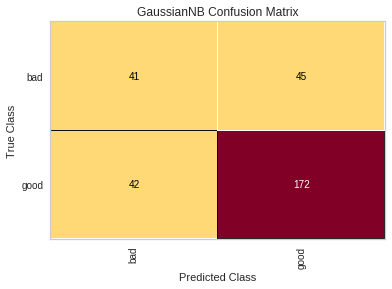

In [25]:
v = ConfusionMatrix(GaussianNB())
v.fit(x_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [26]:
novo_credito = pd.read_csv('NovoCredit.csv')

In [27]:
novo_credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [28]:
novo_credito =  novo_credito.iloc[:,0:20].values

In [29]:
novo_credito

array([["'no checking'", 12, "'existing paid'", 'radio/tv', 804, '<100',
        '>=7', 4, "'male single'", 'none', 4, 'car', 38, 'none', 'own',
        1, 'skilled', 1, 'none', 'yes']], dtype=object)

In [30]:
novo_credito[:,0] = label_encoder.fit_transform(novo_credito[:,0])
novo_credito[:,2] = label_encoder.fit_transform(novo_credito[:,2])
novo_credito[:, 3] = label_encoder.fit_transform(novo_credito[:, 3])
novo_credito[:, 5] = label_encoder.fit_transform(novo_credito[:, 5])
novo_credito[:, 6] = label_encoder.fit_transform(novo_credito[:, 6])
novo_credito[:, 8] = label_encoder.fit_transform(novo_credito[:, 8])
novo_credito[:, 9] = label_encoder.fit_transform(novo_credito[:, 9])
novo_credito[:, 11] = label_encoder.fit_transform(novo_credito[:, 11])
novo_credito[:, 13] = label_encoder.fit_transform(novo_credito[:, 13])
novo_credito[:, 14] = label_encoder.fit_transform(novo_credito[:, 14])
novo_credito[:, 16] = label_encoder.fit_transform(novo_credito[:, 16])
novo_credito[:, 18] = label_encoder.fit_transform(novo_credito[:, 18])
novo_credito[:, 19] = label_encoder.fit_transform(novo_credito[:, 19])

In [31]:
novo_credito

array([[0, 12, 0, 0, 804, 0, 0, 4, 0, 0, 4, 0, 38, 0, 0, 1, 0, 1, 0, 0]],
      dtype=object)

In [32]:
naive_bayes.predict(novo_credito)

array(['good'], dtype='<U4')